In [1]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader


from activation.acts import get_activations
from util.utils import vis_activations
from data.datasets import MNIST
from model.models import BasicMLP
from experiment import Trainer

In [2]:
acts = get_activations(return_type='dict')
acts

{'GELU': GELU(approximate='none'),
 'SoftModulusQ': SoftModulusQ(),
 'Modulus': Modulus(),
 'BipolarSigmoid': BipolarSigmoid(),
 'TanhExp': TanhExp(),
 'BipolarClippedUnit': BipolarClippedUnit()}

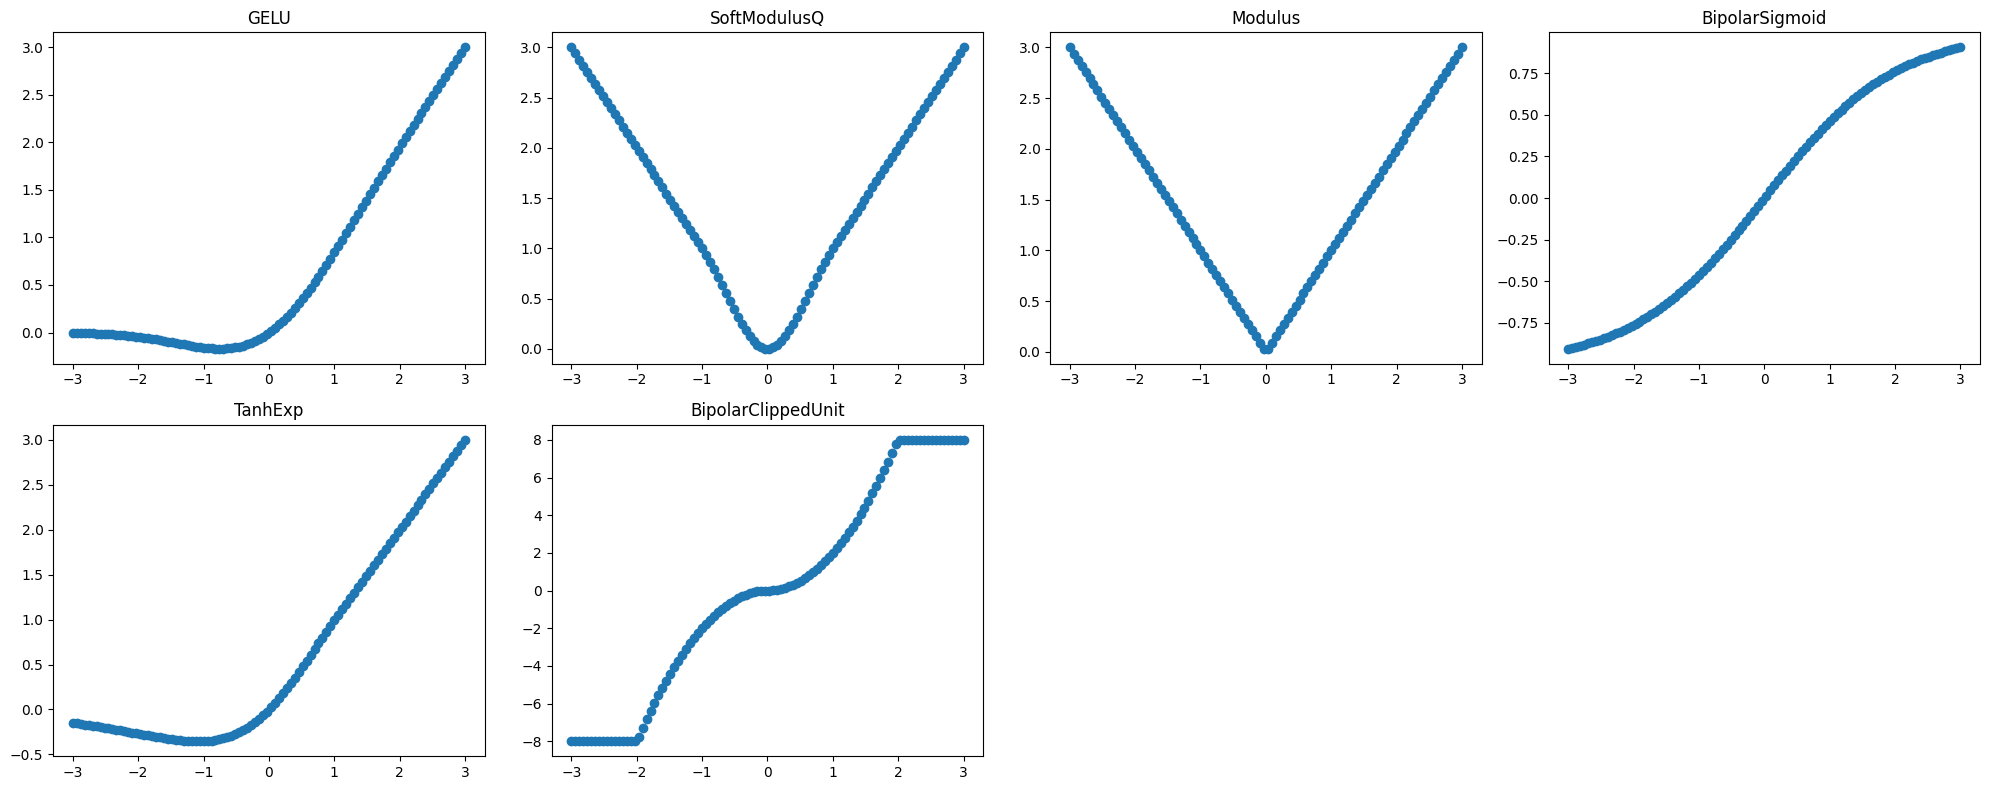

In [3]:
# visualize activation functions
x = torch.linspace(-3, 3, 100)

vis_activations(acts.values(), x, cols=4)

In [4]:
train_dataset = MNIST(train=True)
test_dataset = MNIST(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)


In [5]:
next(iter(test_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [6]:
# model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

num_epochs = 20
learning_rate = 0.001

model = BasicMLP(input_size = 784,
                 hidden_size = 128,
                 num_classes = 10,
                 activation_function=acts[''])

optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

trainer = Trainer(model=model,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=nn.CrossEntropyLoss(),
                  optimizer=optimizer,
                  device=device)


cuda


In [7]:
trainer.run_pipline(num_epochs=num_epochs,experiments_dir='./results')

TypeError: 'NoneType' object is not callable